In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
w

array([10.11488003])

In [ ]:
b = y_train - w * X_train
print(np.average(b))

-8.096541018892367


In [ ]:
def mae(true, pred):    
    return np.mean(np.abs(true - pred))
def mse(true, pred):    
    return np.mean((true - pred)**2)
y_train_predict = w*X_train + np.average(b)
y_test_predict = w*X_test + np.average(b)

In [ ]:
mae_test = [mae(y_test[i], y_test_predict[i]) for i in range(len(y_test_predict))]
print(np.mean(mae_test))

9.50434478217828


In [ ]:
mae_train = [mae(y_train[i], y_train_predict[i]) for i in range(len(y_train_predict))]
print(np.mean(mae_train))

7.954441163244903


In [ ]:
mse_test = [mse(y_test[i], y_test_predict[i]) for i in range(len(y_test_predict))]
print(np.mean(mse_test))

127.66183242105836


In [ ]:
mse_train = [mse(y_train[i], y_train_predict[i]) for i in range(len(y_train_predict))]
print(np.mean(mse_train))

97.8415695123545


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train) # обучение модели

w = model.coef_
b = model.intercept_
print(w,b)

[10.06676733] -8.098970953171746


In [ ]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  97.82189544978826
Test MSE:  127.15633793288634


In [ ]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  7.924388721991457
Test MAE:  9.494819439803111


In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
d = data['x_train'].reshape(-1, 1)
w = np.linalg.inv(d.T @ d) @ d.T @ data['y_train']
w

array([0.16372333])

In [ ]:
b = data['y_train'] - w * data['x_train']
print(np.mean(b))

0.46419953234123945


In [ ]:
sin_y_train_predict = w*X_train + np.average(b)

In [ ]:
mae_train = [mae(data['y_train'][i], sin_y_train_predict[i]) for i in range(len(sin_y_train_predict))]
print(np.mean(mae_train))
mse_train = [mse(data['y_train'][i], sin_y_train_predict[i]) for i in range(len(sin_y_train_predict))]
print(np.mean(mse_train))

1.0496773385835279
1.165912969969038


In [ ]:
model = LinearRegression()

model.fit(data['x_train'].reshape(-1, 1), data['y_train']) # обучение модели

w = model.coef_
b = model.intercept_

In [ ]:
w,b

(array([-0.28973032]), 1.9019081534418252)

In [ ]:
sin_y_train_predict = model.predict(data['x_train'].reshape(-1, 1))
print('Train MAE: ', mean_absolute_error(data['y_train'], sin_y_train_predict))
print('Train MSE: ', mean_squared_error(data['y_train'], sin_y_train_predict))

Train MAE:  0.461677692279751
Train MSE:  0.30685637993134723


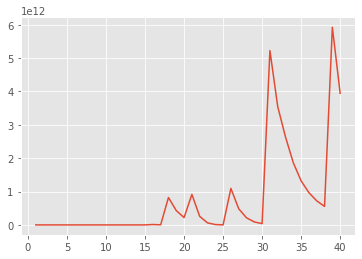

In [ ]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [i for i in range(1,41)]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

scores = []

for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    score = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    scores.append(-(np.average(score)))
plt.plot(degrees, scores)

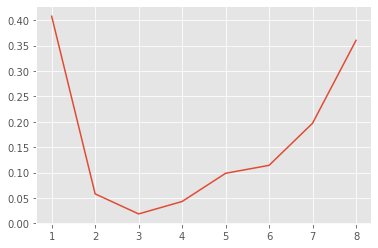

In [ ]:
plt.plot(degrees[0:8],scores[0:8],)

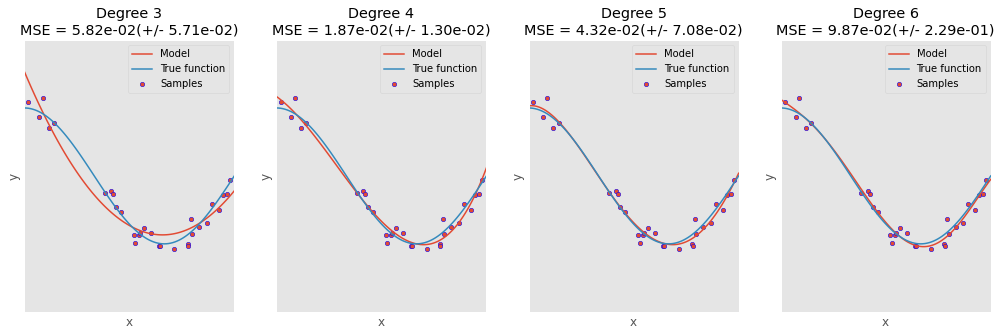

In [ ]:
plt.figure(figsize=(180, 5))
l = [2,3,4,5]
for i in l:
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=i,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

Вывод: 4 степень лучше всего подходит к данной модели, т.к. средняя квадратичная ошибка минимальная и при данной степени не просиходит ни underfitting ни overfitting(как мы видим из графиков)

In [ ]:
from sklearn.datasets import load_boston
house_data = load_boston()
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
print(y_train.shape, y_test.shape)
model = LinearRegression()
model.fit(X_train, y_train)


y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

(354,) (152,)
Train MSE:  23.988611272674554
Test MSE:  17.62501513305416
Train MAE:  3.4214723754421845
Test MAE:  3.0807109486066135


<BarContainer object of 13 artists>

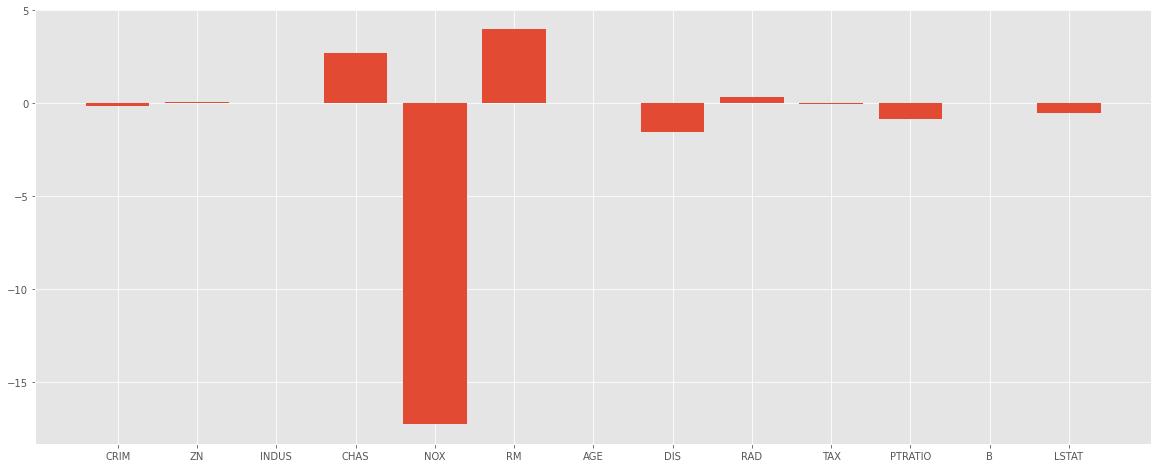

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

Для нахождения 7 наиболее значимых признаков, произведем нормировку данных а затем уберем ненужные столбцы признаков из датасета и переобучим модель

<BarContainer object of 13 artists>

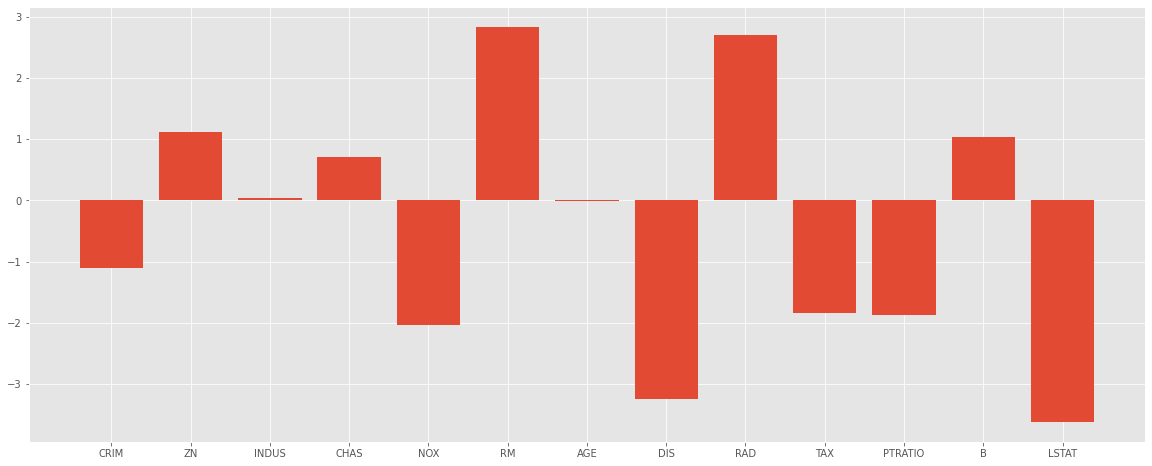

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

Видим что самые весомые столбцы это LSTAT, DIS, RAD, RM, NOX, TAX, PTRATIO

In [ ]:
X1 = pd.DataFrame(house_data['data'], columns=house_data['feature_names'] )
X1 = X1[['NOX','RM', 'DIS','RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y1 = house_data['target']
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X1, y1, train_size=0.7)

model = LinearRegression()

model.fit(X_train_7, y_train_7)

y_train_prediction_7 = model.predict(X_train_7)
y_test_prediction_7 = model.predict(X_test_7)
print('Train MSE: ', mean_squared_error(y_train_7, y_train_prediction_7))
print('Test MSE: ', mean_squared_error(y_test_7, y_test_prediction_7))

print('Train MAE: ', mean_absolute_error(y_train_7, y_train_prediction_7))
print('Test MAE: ', mean_absolute_error(y_test_7, y_test_prediction_7))

Train MSE:  22.232226042090577
Test MSE:  28.67018400145839
Train MAE:  3.3110146881826807
Test MAE:  3.8488515577277673
